In [1389]:
import sys, os
import importlib
from importlib import reload
# importlib.import_module(module_name)

import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import scipy
import tqdm
import joblib

sys.path.append("../../../python")
from simhelper import util, root, generator, parser
from simhelper import datatypes
from simhelper import helper_basic as hp
from simhelper import helper_plt as hplt
reload(parser)
reload(datatypes)

sys.path.append("..")
import cut_functions
reload(cut_functions)

np.set_printoptions(edgeitems=30, linewidth=100000, 
    precision=3)

# Plot settings
reload(hplt)
hplt.plt_config() # Default plotting styles
%config InlineBackend.figure_format='retina'

In [496]:
data_dir="/home/tomren/geant_projects/musim_test/cedar"
data_dir="/home/tomren/geant_projects/musim_test/cedar_cosmic_n"
fname_comb = f"{data_dir}/series_2_digi_recon_skim.root"
# fname_comb = "/home/tomren/geant_projects/musim_test/cedar/cosmic/cosmic_p/skim/merged.root"
fname_comb = "/home/tomren/geant_projects/musim_test/cedar/cosmic/cosmic_p/merged_p_1200runs.root"
fname_sig1 = "/home/tomren/geant_projects/musim_test/llp_hxx_bb/run_25_digi_cosmic_recon_skim.root"
fname_sig2 = "/home/tomren/geant_projects/musim_test/llp_hxx_bb/run_45_digi_cosmic_recon_skim.root"

fbkg = root.tfile_reader(fname_comb)
fbkg.ls()
## Get metadata
fbkg.get_tree("metadata_digi")
metadata_digi = fbkg.get_entry(0)
fbkg.get_tree("data;1")
print("Entries", fbkg.entries)

fsig1 = root.tfile_reader(fname_sig1)
fsig1.ls()
fsig1.get_tree("data;1")
print("Entries", fsig1.entries)

fsig2 = root.tfile_reader(fname_sig2)
fsig2.ls()
fsig2.get_tree("data;1")
print("Entries", fsig2.entries)

None
Entries 839934
None
Entries 9172
None
Entries 9120
TFile**		/home/tomren/geant_projects/musim_test/cedar/cosmic/cosmic_p/merged_p_1200runs.root	
 TFile*		/home/tomren/geant_projects/musim_test/cedar/cosmic/cosmic_p/merged_p_1200runs.root	
  KEY: TTree	metadata;1	Metadata for reconstruction
  KEY: TTree	metadata_digi;1	Metadata for digitization
  KEY: TTree	metadata_recon;1	Simulation metadata
  KEY: TParameter<int>	N_MERGED;1	
  KEY: TTree	data;1	Reconstruction Tree Skimmed
TFile**		/home/tomren/geant_projects/musim_test/llp_hxx_bb/run_25_digi_cosmic_recon_skim.root	
 TFile*		/home/tomren/geant_projects/musim_test/llp_hxx_bb/run_25_digi_cosmic_recon_skim.root	
  KEY: TTree	metadata;1	Metadata for reconstruction
  KEY: TTree	metadata_digi;1	Metadata for digitization
  KEY: TTree	metadata_recon;1	Simulation metadata
  KEY: TTree	data;1	Reconstruction Tree Skimmed
TFile**		/home/tomren/geant_projects/musim_test/llp_hxx_bb/run_45_digi_cosmic_recon_skim.root	
 TFile*		/home/tomren/gean

In [542]:
reload = False
save = False

efficiency = 0.95

if reload:
    # entries = 100000
    entries = -1
    res_bkg = cut_functions.run_processing(fbkg, entries=entries, efficiency = efficiency);
    if save:
        joblib.dump(res_bkg.data, f"/home/tomren/geant_projects/musim_test/cedar/cosmic/cosmic_p/skim/rrq_bkg_eff{efficiency:.2f}.joblib")
    
    # entries = 2000
    entries = -1
    res_sig1 = cut_functions.run_processing(fsig1, entries=entries, efficiency = efficiency);
    res_sig2 = cut_functions.run_processing(fsig2, entries=entries, efficiency = efficiency);
    if save:
        joblib.dump(res_sig1.data, f"/home/tomren/geant_projects/musim_test/cedar/cosmic/cosmic_p/skim/rrq_sig1_cosmic_eff{efficiency:.2f}.joblib")
        joblib.dump(res_sig2.data, f"/home/tomren/geant_projects/musim_test/cedar/cosmic/cosmic_p/skim/rrq_sig2_cosmic_eff{efficiency:.2f}.joblib")

else:
    res_bkg_data = joblib.load(f"/home/tomren/geant_projects/musim_test/cedar/cosmic/cosmic_p/skim/rrq_bkg_eff{efficiency:.2f}.joblib")
    res_sig1_data = joblib.load(f"/home/tomren/geant_projects/musim_test/cedar/cosmic/cosmic_p/skim/rrq_sig1_cosmic_eff{efficiency:.2f}.joblib")
    res_sig2_data = joblib.load(f"/home/tomren/geant_projects/musim_test/cedar/cosmic/cosmic_p/skim/rrq_sig2_cosmic_eff{efficiency:.2f}.joblib")    
    res_bkg = cut_functions.RQ_dict(res_bkg_data)
    res_sig1 = cut_functions.RQ_dict(res_sig1_data)
    res_sig2 = cut_functions.RQ_dict(res_sig2_data)

Entries 839934
Finished
Entries 9172
Finished
Entries 9120
Finished


In [783]:
# entries = 100000
# res_bkg = cut_functions.run_processing(fbkg, entries=entries, efficiency = efficiency);
# entries = 500
# res_sig1 = cut_functions.run_processing(fsig1, entries=entries, efficiency = efficiency);
# res_sig2 = cut_functions.run_processing(fsig2, entries=entries, efficiency = efficiency);

Entries 839934
Finished
Entries 9172
Finished
Entries 9120
Finished


In [1411]:
colors = ["C0", "C2", "C1"]
labels = ["HXXbb 25 GeV", "HXXbb 45 GeV", "Bkg p"]
markers = ["s", "s", "P"]

Add cut: More than 3 tracks, passage fraction 0.7078502815501821, (& > 2 tracks): 0.7078502815501821
Add cut: More than 3 tracks, passage fraction 0.7318161535029005, (& > 2 tracks): 0.7318161535029005
Add cut: More than 3 tracks, passage fraction 0.001888095137450508, (& > 2 tracks): 0.001888095137450508


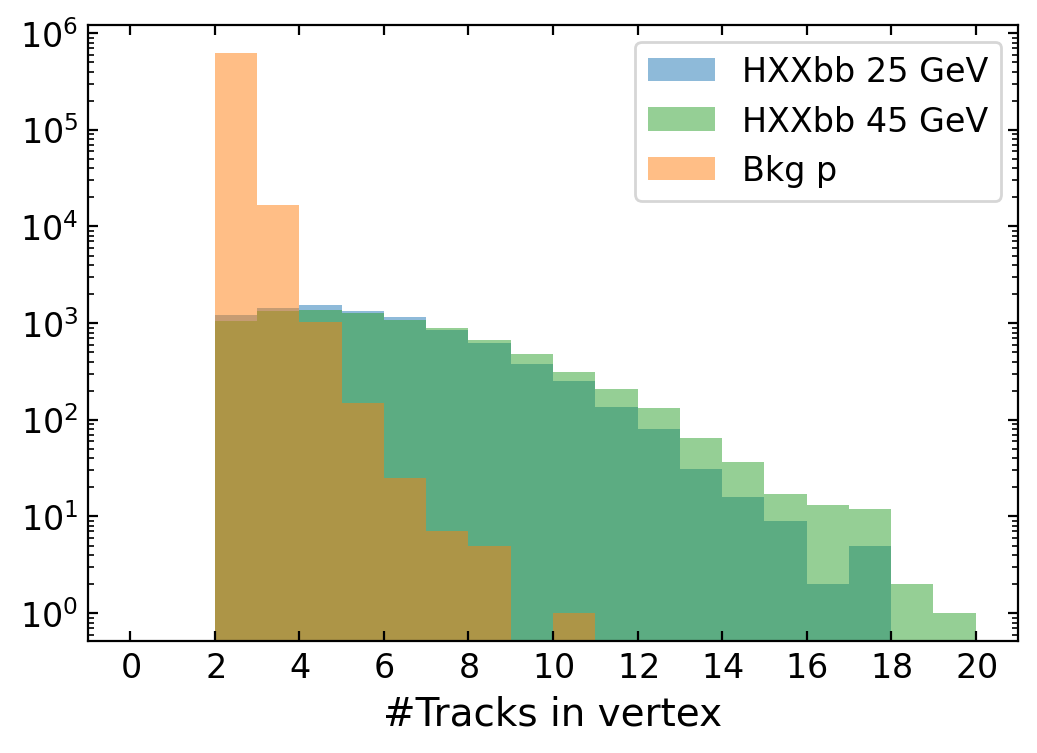

In [1423]:
for i, res in enumerate([res_sig1, res_sig2, res_bkg]):
    # plt.hist(res["vertex_ntracks"] - res["vertex_ndownward_track"], bins=20,range=(0,20), alpha=0.5);
    plt.hist(res["vertex_ntracks"], bins=20,range=(0,20), alpha=0.5, color=colors[i], label=labels[i])

    # Add a cut for 3 tracks
    name = "More than 3 tracks"
    func = lambda res: res["vertex_ntracks"]>3
    res.add_cut(func, name)   

plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=11, integer=True))
plt.yscale("log")
plt.xlabel("#Tracks in vertex")
plt.legend()
plt.show()

0.6801283473251081
0.6786195226237309
0.18390478006373087


Text(0.5, 0, 'Hits to vertex speed [mm/ns]')

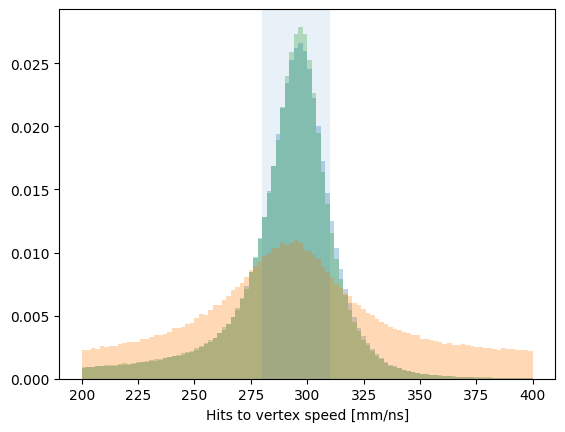

In [949]:
for i, res in enumerate([res_sig1, res_sig2, res_bkg]):
    mask = res.get_cut("More than 2 tracks") #| res.get_cut("True")
    y = util.Utils.flatten1d(res["vertex_comp_metric_speed"][:][mask])
    plt.hist(y, bins=100, range=[200,400], alpha=0.3, color=colors[i], density=1)
    print(sum(abs(y-295)<20)/len(y))
plt.axvspan(295-15, 295+15, alpha=0.1)
plt.xlabel("Hits to vertex speed [mm/ns]")

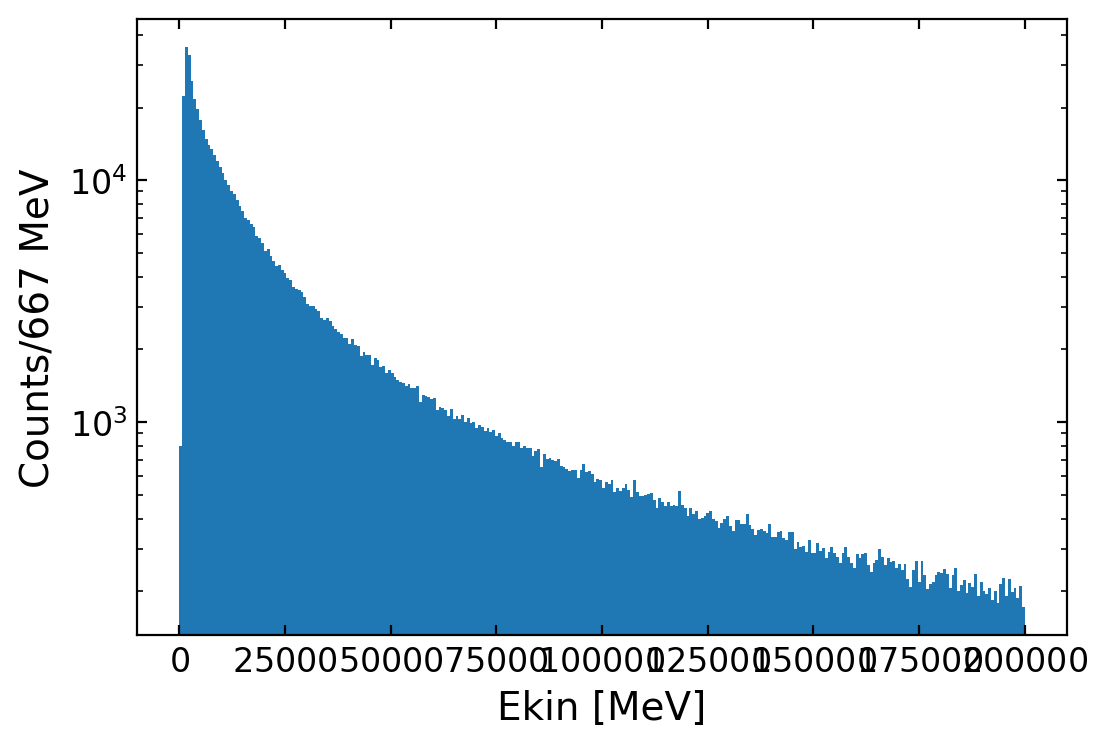

Text(0, 0.5, 'Counts/MeV')

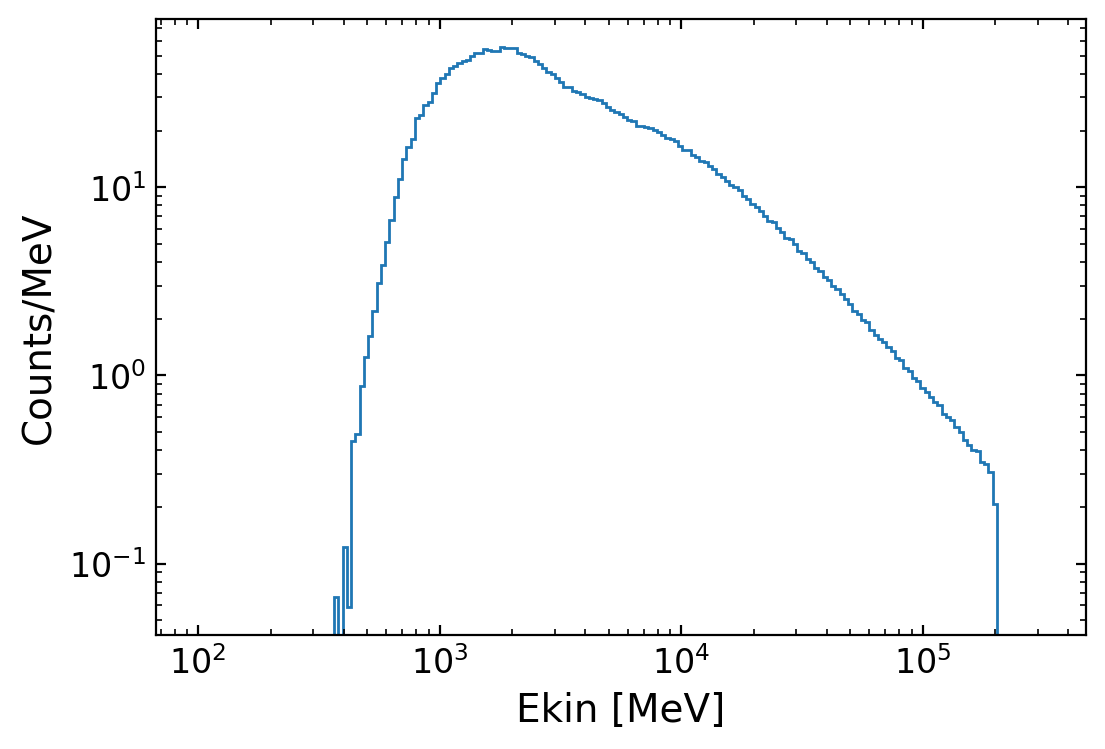

In [1399]:
res = res_bkg
p = np.linalg.norm(res["gen_p3"], axis=1)
m =938
ek = np.sqrt(p**2 + m**2)  - m
plt.hist(ek, bins=300, range=(.1,200e3));
plt.yscale("log")
plt.xlabel("Ekin [MeV]")
plt.ylabel(f"Counts/{200e3/300:.0f} MeV")
plt.show()

n,ibins = np.histogram(ek, bins=np.logspace(2,5.5,200));
plt.stairs(n/np.diff(ibins), ibins)
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Ekin [MeV]")
plt.ylabel("Counts/MeV")

Add cut: Fiducial volume, passage fraction 0.9722866291266423, (& > 2 tracks): 0.8418902506348681
0.8418902506348681


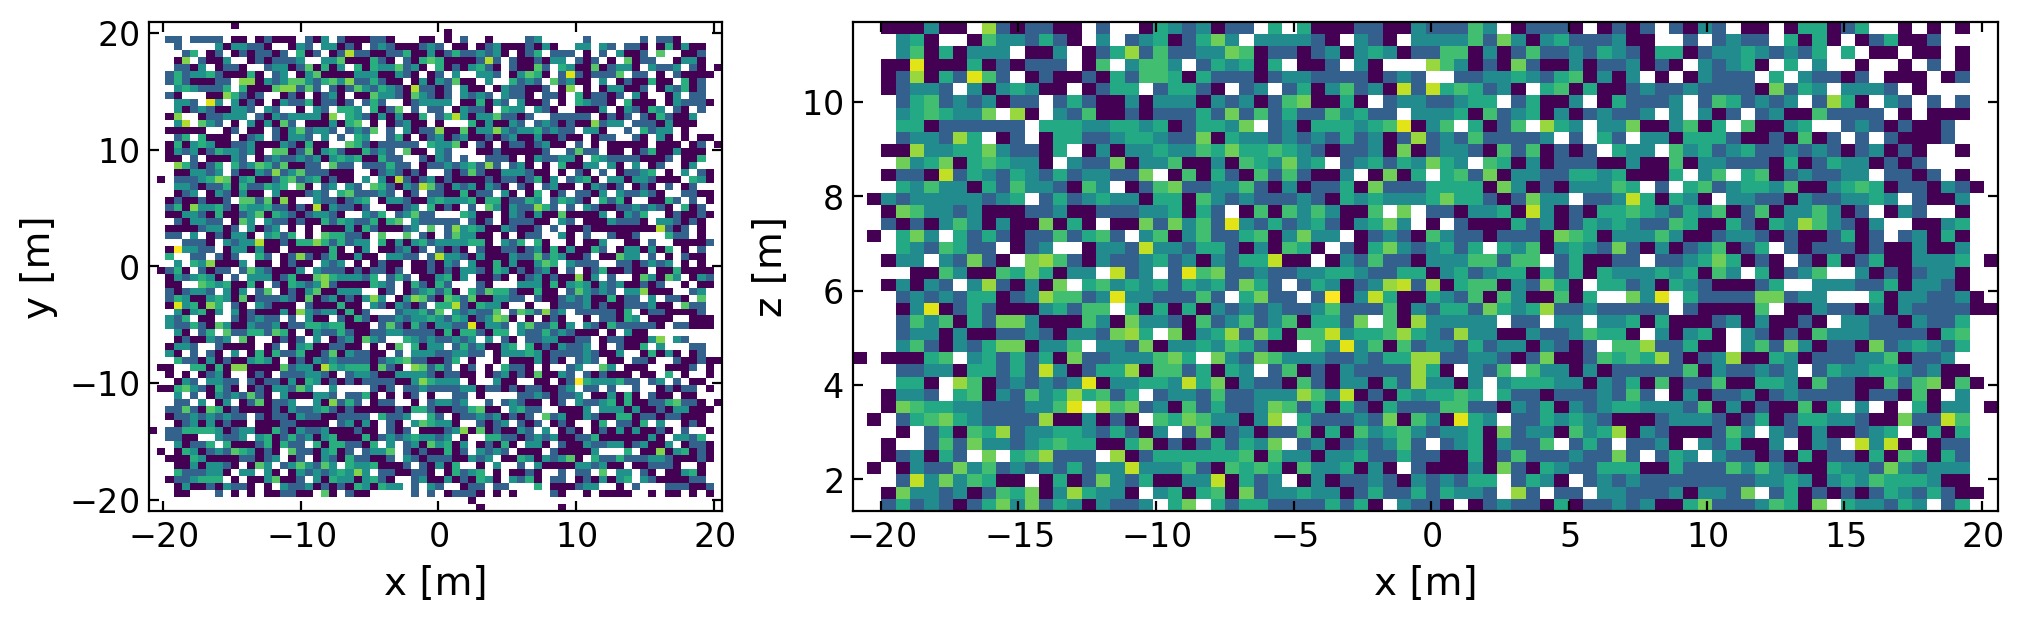

Add cut: Fiducial volume, passage fraction 0.9714413208389112, (& > 2 tracks): 0.857429718875502
0.857429718875502


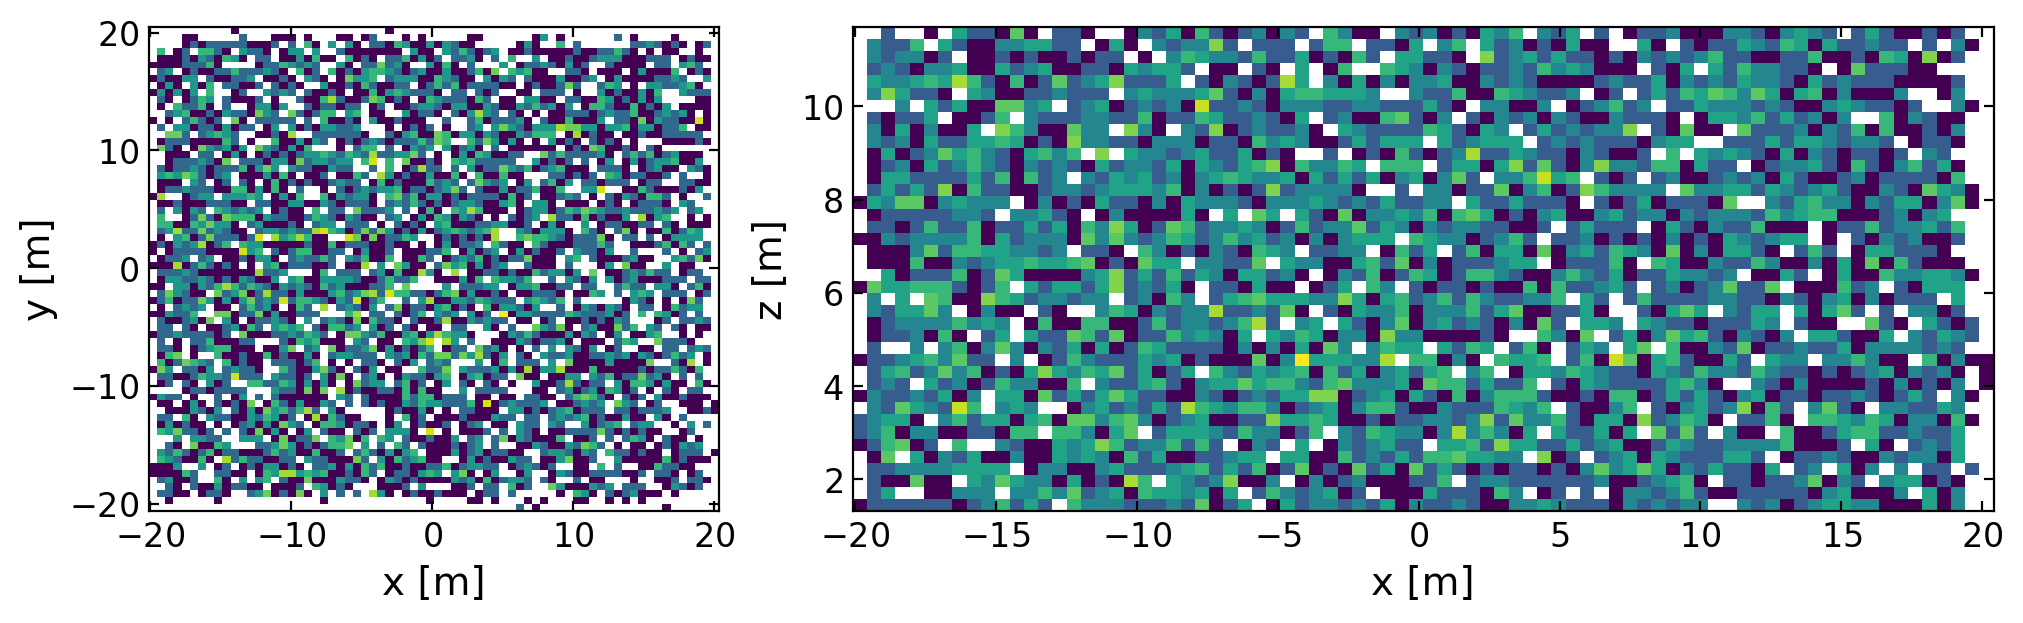

Add cut: Fiducial volume, passage fraction 0.8870242775218047, (& > 2 tracks): 0.018367439595828657
0.018367439595828657


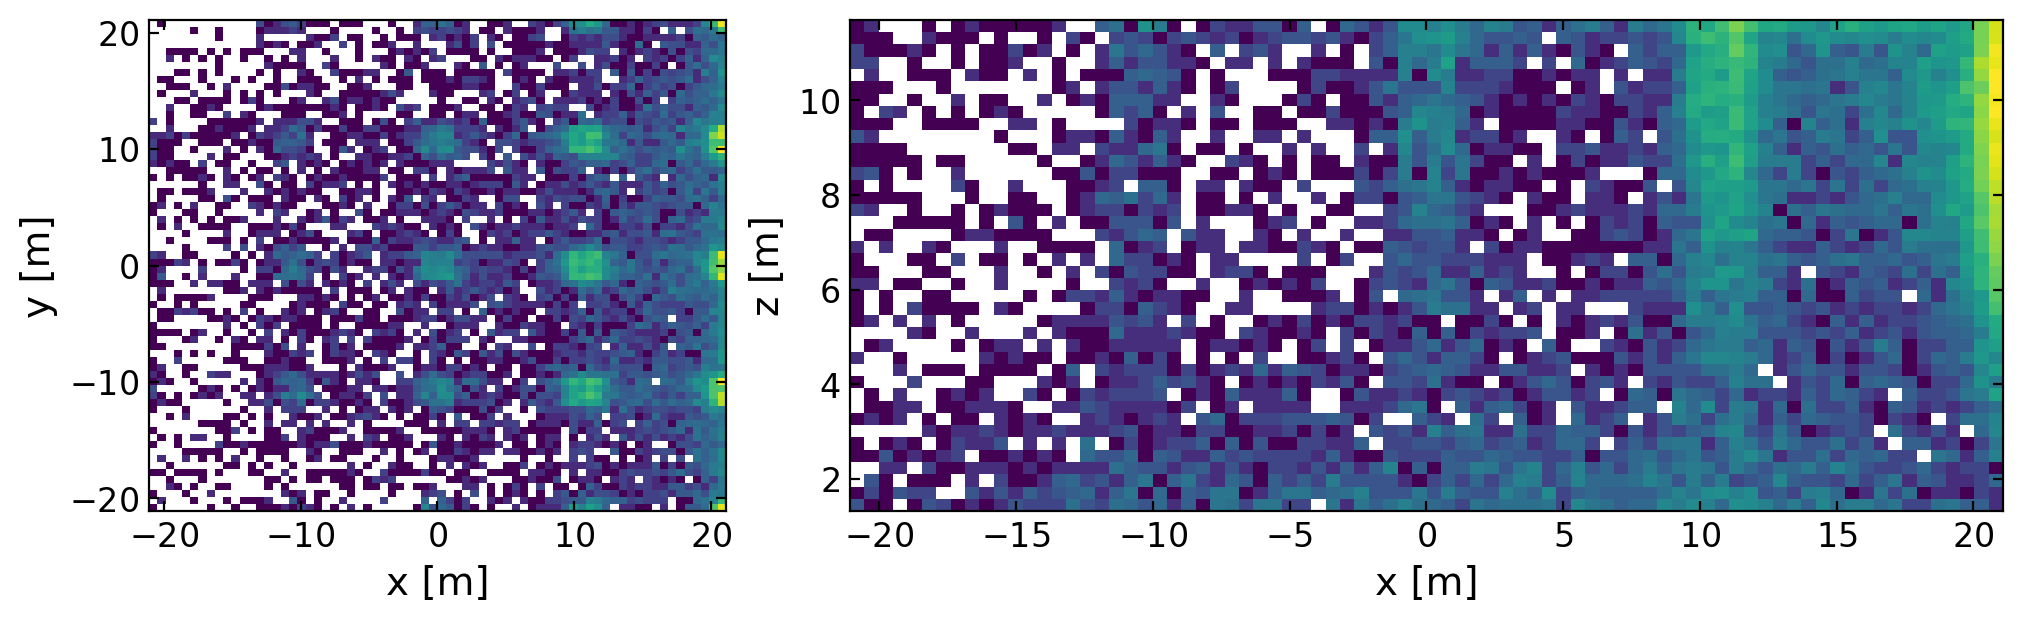

In [1403]:
def c_fid(res):
    pillar_locations = [[i*10700,j*10700] for i in range(-2,2) for j in range(-2,3)]
    pillar_locations_right = [[i*10700,j*10700] for i in [2] for j in range(-2,3)]
    cut_range = 1000
    cut_range_right = 1200
    mask = np.ones_like(res["vertex_ndigi"], dtype=bool)
    for x,y in pillar_locations:
        mask = mask & ((abs(res["vertex_xyzt"][:,0]-x)>cut_range) | (abs(res["vertex_xyzt"][:,1]-y)>cut_range))

    for x,y in pillar_locations_right:
        mask = mask & ((abs(res["vertex_xyzt"][:,0]-x)>cut_range_right) | (abs(res["vertex_xyzt"][:,1]-y)>cut_range_right))    
    return mask
    

for i, res in enumerate([res_sig1, res_sig2, res_bkg]):
    res.add_cut(c_fid, "Fiducial volume")
    
    mask = res.get_cut("More than 2 tracks")# & res.get_cut("N track downward")#| res.get_cut("True")
    mask_fid = res.get_cut("More than 2 tracks") & res.get_cut("Fiducial volume")#| res.get_cut("True")
    # print(sum(mask))
    print(sum(mask_fid)/len(mask_fid))
    
    
    fig = plt.figure(figsize=(10,3), layout="constrained")
    spec = fig.add_gridspec(1,3)
    
    ax1 = fig.add_subplot(spec[:, :1])
    ax2 = fig.add_subplot(spec[:, 1:])


    x = (res["vertex_xyzt"][:,0])[mask]/1000
    y = (res["vertex_xyzt"][:,1])[mask]/1000
    x_reject = (res["vertex_xyzt"][:,0])[mask&~mask_fid]
    y_reject = (res["vertex_xyzt"][:,1])[mask&~mask_fid]    
    ax1.hist2d(x, y, bins=(70,70), norm=mpl.colors.LogNorm())
    # ax1.scatter(x, y, alpha=0.83 - np.heaviside(i-1,0)*0.8, s=20 - np.heaviside(i-1,0)*19, color=colors[i])
    ax1.scatter(x_reject, y_reject, alpha=0.83 - np.heaviside(i-1,0)*0.8, s=10 - np.heaviside(i-1,0)*5, color="r")
    ax1.set_xlabel("x [m]")
    ax1.set_ylabel("y [m]")

    x = (res["vertex_xyzt"][:,0])[mask]/1000
    y = (res["vertex_xyzt"][:,2])[mask]/1000
    ax2.hist2d(x, y, bins=(80,40), norm=mpl.colors.LogNorm())
    # ax2.scatter(x, y, alpha=0.83 - np.heaviside(i-1,0)*0.8, s=20 - np.heaviside(i-1,0)*19, color=colors[i])
    ax2.set_xlabel("x [m]")
    ax2.set_ylabel("z [m]")
    
    plt.show()

Add cut: N track downward, passage fraction 0.9393839019542894, (& > 2 tracks): 0.8257701225571381
Add cut: N track downward, passage fraction 0.9226907630522089, (& > 2 tracks): 0.8274207942882642
Add cut: N track downward, passage fraction 0.32175583454274753, (& > 2 tracks): 0.0043241449167813455


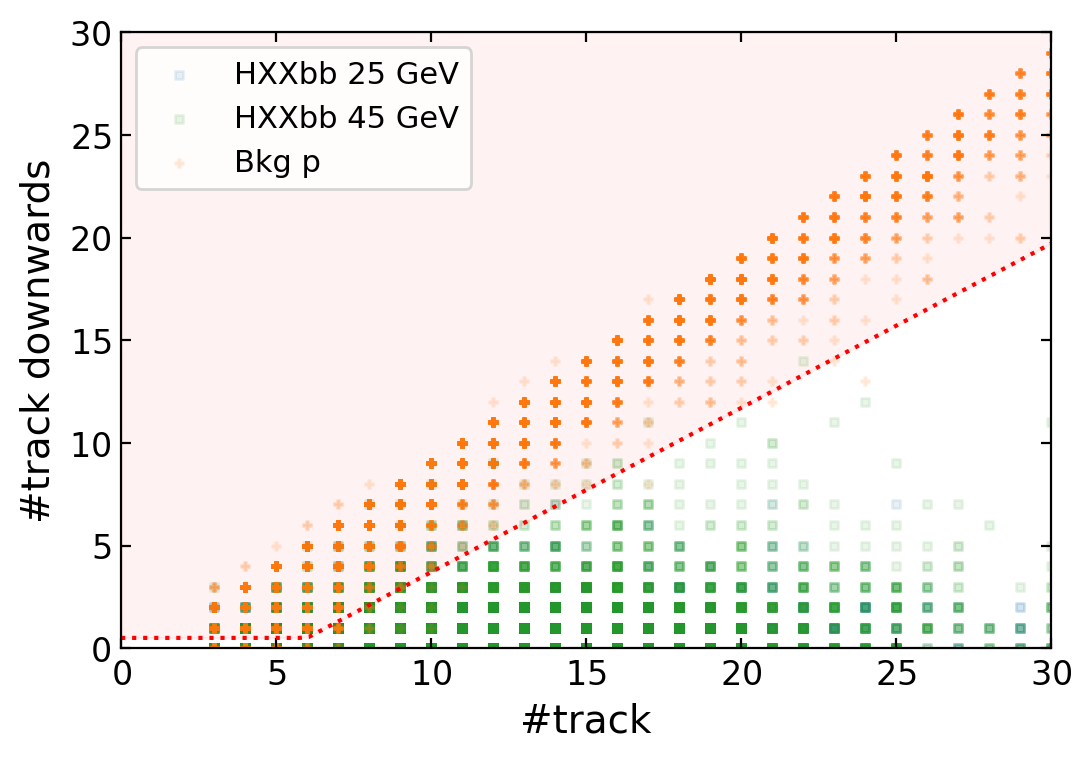

In [1414]:
f_ndown_cut = lambda x: ((x-6)*.8 + 0.5) * (x >=6) + 0.5 * (x<6)
c_ndown = lambda data: (res["event_ndownward_track"][:,0] + res["event_ndownward_track"][:,1])< f_ndown_cut(res["event_ntracks"])
# c_ndown = lambda data: (res["event_ndownward_track"])< f_ndown_cut(res["event_ntracks"])

for i, res in enumerate([res_sig1, res_sig2, res_bkg]):
    res.add_cut(c_ndown, "N track downward")

    # mask = res.get_cut("N_hits vs N_veto") & res.get_cut("N_hits vs N_veto 2") # & res.get_cut("N_tracks") #| res.get_cut("True")
    mask = res.get_cut("More than 2 tracks") & res.get_cut("Fiducial volume") #| res.get_cut("True")

    x = (res["event_ntracks"])[mask]
    y = (res["event_ndownward_track"][:,0] + res["event_ndownward_track"][:,1])[mask]
    # y = (res["event_ndownward_track"])[mask]
    plt.scatter(x, y, alpha=0.1, s=10, color=colors[i], label=labels[i], marker=markers[i])


xlim=30
ylim=30
x_plot = np.linspace(0,xlim,100)
plt.plot(x_plot, f_ndown_cut(x_plot), color="r", linestyle=":")
plt.fill_between(x_plot, f_ndown_cut(x_plot), ylim, color="r", alpha=0.05)
plt.xlabel("#track")
plt.ylabel("#track downwards")
plt.xlim(0,xlim)
plt.ylim(0,ylim)
plt.legend(fontsize=11)


7625
Add cut: Track velocity, passage fraction 0.973169923815833, (& > 2 tracks): 0.857347907695705
7686
Add cut: Track velocity, passage fraction 0.9746764837126283, (& > 2 tracks): 0.8718206157965194
11732
Add cut: Track velocity, passage fraction 0.7631176427304424, (& > 2 tracks): 0.022276704569472037


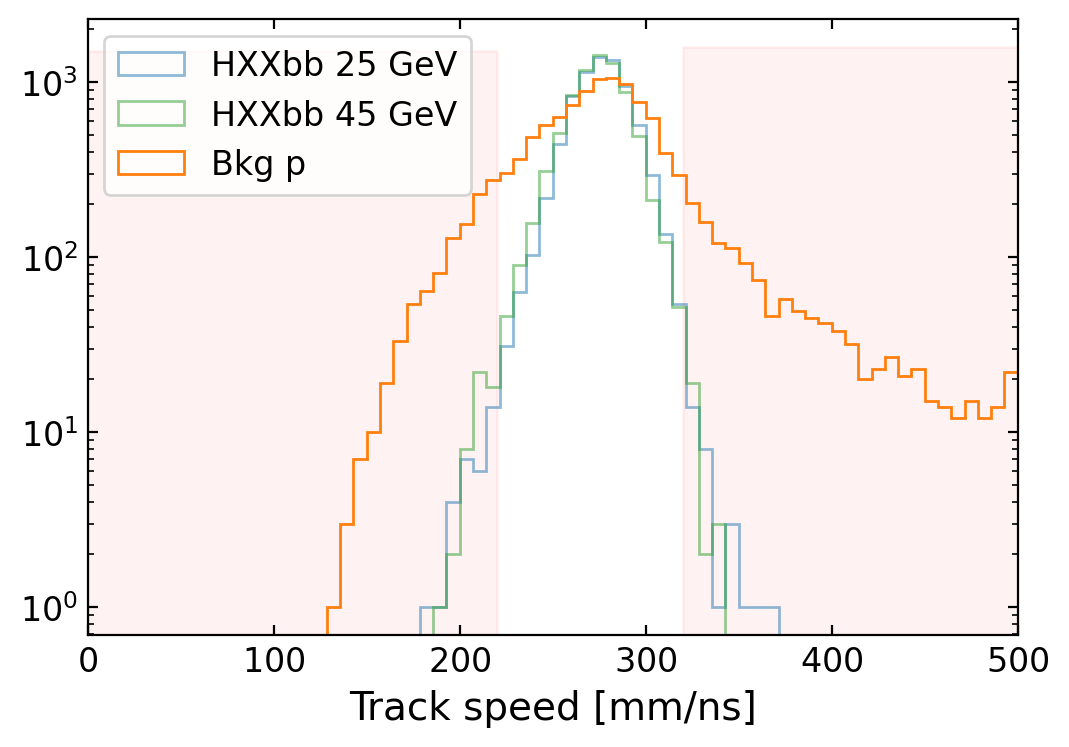

In [1416]:
for i, res in enumerate([res_sig1, res_sig2, res_bkg]):
    mask = res.get_cut("More than 2 tracks") & res.get_cut("Fiducial volume")#& res.get_cut("N track downward")
    print(sum(mask))
    plt.hist(res["vertex_slowest_track"][mask], bins=70,range=(0,500), alpha=0.5+ np.heaviside(i-1, 0) * 0.5, color=colors[i], histtype="step", label=labels[i])

    res.add_cut(lambda res: (res["vertex_slowest_track"]> 220) & (res["vertex_slowest_track"]<320), "Track velocity")
    
plt.xlabel("Track speed [mm/ns]")
plt.fill_betweenx(np.linspace(*plt.gca().get_ylim()), 0, 220, color="r", alpha=0.05)
plt.fill_betweenx(np.linspace(*plt.gca().get_ylim()), 320, 500, color="r", alpha=0.05)

plt.xlim(0,500)
plt.yscale("log")
# plt.axvline(275)
plt.legend()
plt.show()

Add cut: N_hits vs N_veto, passage fraction 0.882742630009937, (& > 2 tracks): 0.7987192227006735
Add cut: N_hits vs N_veto, passage fraction 0.8683623382418563, (& > 2 tracks): 0.8029897367246764
Add cut: N_hits vs N_veto, passage fraction 0.0003553877248766711, (& > 2 tracks): 3.4442863203906445e-05


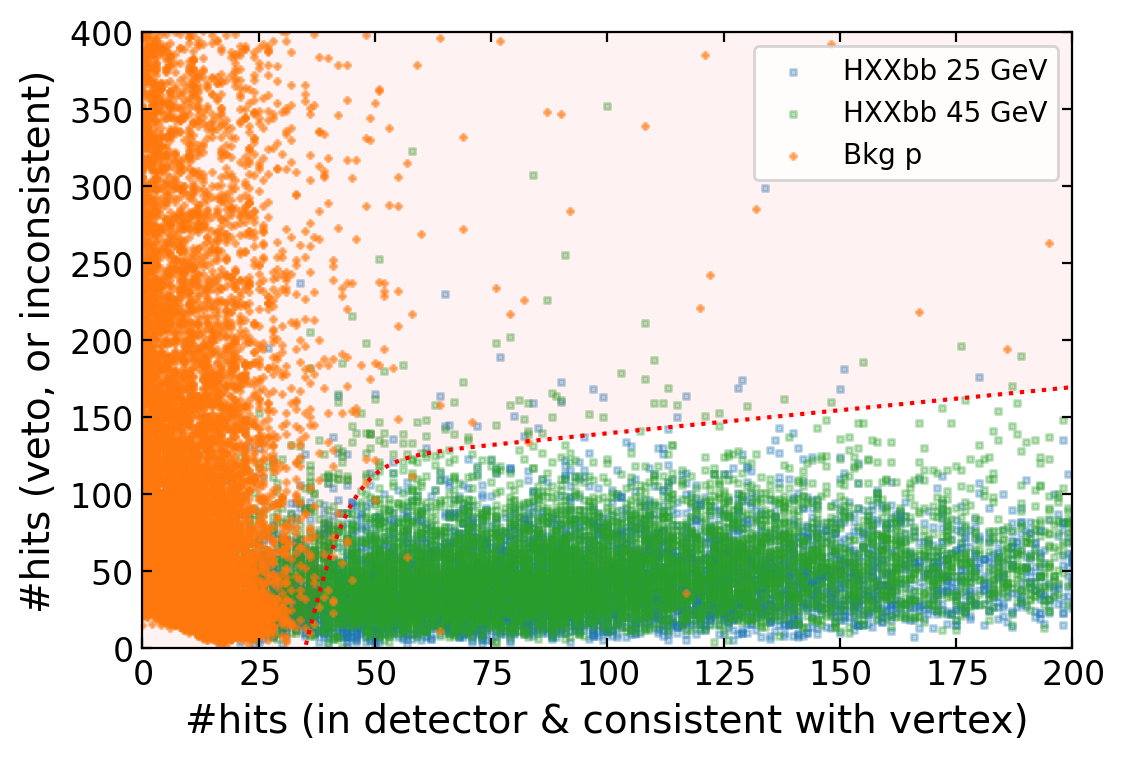

In [1418]:
N_VETO_THRESHOLD=150
# f_nhits_cut = lambda x: (x-30)*7
# def f_nhits_cut_plot(x):
#     y  = f_nhits_cut(x)
#     y_threshold = N_VETO_THRESHOLD
#     return y * (y <= y_threshold) + y_threshold*(y > y_threshold)
def f_nhits_cut(x):
    x0 = 35
    squeeze = 10
    yscale = 120
    slope = 0.3
    y =  np.tanh((x-x0)/squeeze ) * yscale * (1+ (x-x0)/yscale * slope)
    return y
    # ((x-6)*.9 + 0.5) * (x >=6) + 0.5 * (x<6)
    # y  = (x-30)*4
    # y_threshold = 150
    # return (x-30)*4 * (y <= y_threshold) + y_threshold*(y > y_threshold)

c_nhits = lambda data: (res["event_ndigi_veto"] + res["event_ndigi_active"] - res["vertex_ndigi_veto_after_comp"] - res["vertex_ndigi_active_after_comp"]) < f_nhits_cut(res["vertex_ndigi_active_after_comp"])


for i, res in enumerate([res_sig1, res_sig2, res_bkg]):
    mask = res.get_cut("More than 2 tracks") & res.get_cut("Fiducial volume") # & res.get_cut("N track downward")#| res.get_cut("True")
    x = (res["vertex_ndigi_active_after_comp"])[mask]
    y = (res["event_ndigi_veto"] + res["event_ndigi_active"] - res["vertex_ndigi_veto_after_comp"] - res["vertex_ndigi_active_after_comp"])[mask]
    plt.scatter(x, y,  alpha=0.3+ np.heaviside(i-1, 0) * 0.2, s=6, color=colors[i], label=labels[i], marker=markers[i])

    res.add_cut(c_nhits, "N_hits vs N_veto")

# confirm cut
res = res_bkg
mask = res.get_cut("More than 2 tracks") & res.get_cut("N_hits vs N_veto")
x = (res["vertex_ndigi_active_after_comp"])[mask]
y = (res["event_ndigi_veto"] + res["event_ndigi_active"] - res["vertex_ndigi_veto_after_comp"] - res["vertex_ndigi_active_after_comp"])[mask]
# plt.scatter(x, y,  alpha=0.8, s=6, color="r")


xlim = 200
ylim = 400
x_plot = np.linspace(0,xlim,100)
plt.plot(x_plot, f_nhits_cut(x_plot), color="r", linestyle=":")
plt.fill_between(x_plot, f_nhits_cut(x_plot), ylim, color="r", alpha=0.05)
plt.xlabel("#hits (in detector & consistent with vertex)")
plt.ylabel("#hits (veto, or inconsistent)")
plt.xlim(0,xlim)
plt.ylim(0,ylim)
plt.legend(fontsize=10)

# plt.xlim(0,56)
# plt.ylim(0,56) =

7625
Add cut: N_hits vs N_veto 2, passage fraction 0.9506459092414706, (& > 2 tracks): 0.8511648448713702
7686
Add cut: N_hits vs N_veto 2, passage fraction 0.9394243641231593, (& > 2 tracks): 0.8604417670682731
11732
Add cut: N_hits vs N_veto 2, passage fraction 0.12380956854051499, (& > 2 tracks): 0.006674087538102417


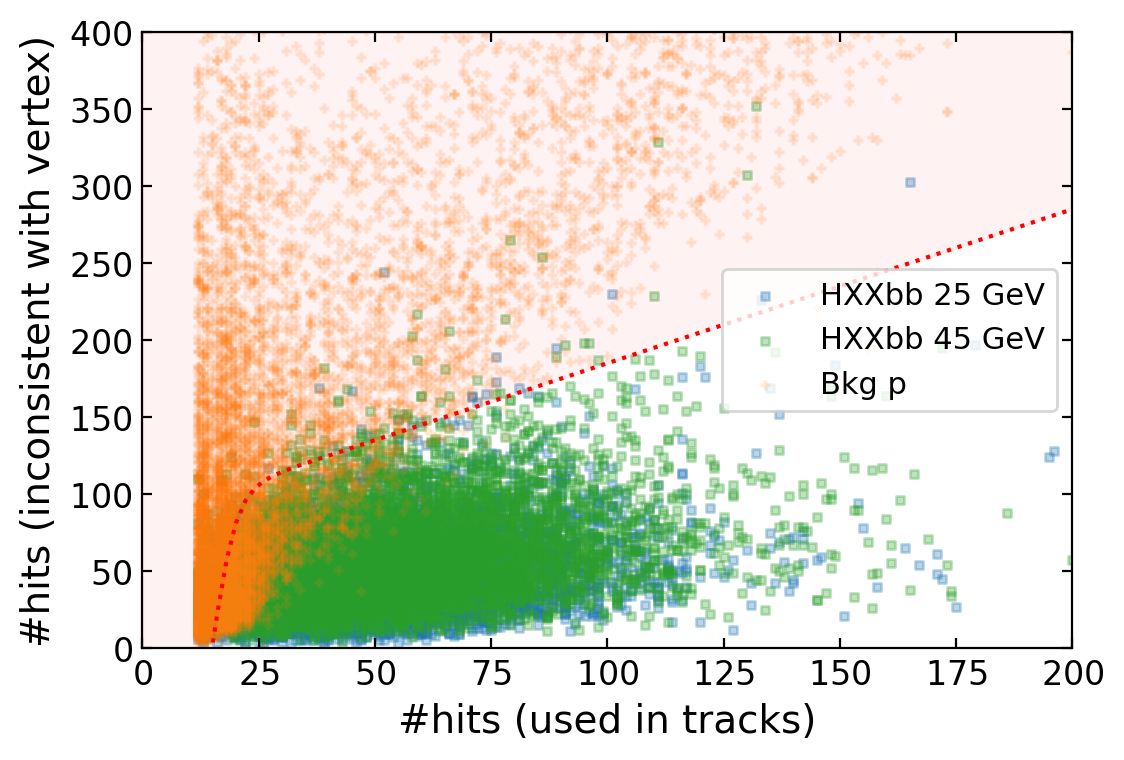

In [1420]:
def f_nhits_cut2(x):
    line = (x-6)*4.6
    ycut = 22
    return line * (line>ycut) +  ycut * (line<=ycut)

def f_nhits_cut2(x):
    x0 = 15
    squeeze = 5
    yscale = 100
    slope = 1
    y =  np.tanh((x-x0)/squeeze ) * yscale * (1+ (x-x0)/yscale * slope)
    # return y * (y>20) + 20 * (y<=20)
    return y
    
c_nhits2 = lambda data: (res["event_nhits"] - res["vertex_ndigi_active_after_comp"]) < f_nhits_cut2(res["event_track_nhits"])

for i, res in enumerate([res_sig1, res_sig2, res_bkg]):
    mask = res.get_cut("More than 2 tracks") & res.get_cut("Fiducial volume")#&res.get_cut("N_hits vs N_veto") #| res.get_cut("True")
    print(sum(mask))
    # mask = res.get_cut("True")
    # mask = res.get_cut("N_tracks") 


    x = (res["event_track_nhits"])[mask]
    y = (res["event_nhits"]- res["vertex_ndigi_active_after_comp"])[mask]
    # y = (res["event_nhits"] - res["event_track_nhits"] + res["vertex_ndigi"]- res["vertex_ndigi_active_after_comp"])[mask]
    plt.scatter(x, y, alpha=0.3+ np.heaviside(i-1, 0) * -0.2, s=10, color=colors[i], label=labels[i], marker=markers[i])

    # Add new cut
    res.add_cut(c_nhits2, "N_hits vs N_veto 2")


xlim=200
ylim=400
x_plot = np.linspace(0,xlim,100)
plt.plot(x_plot, f_nhits_cut2(x_plot), color="r", linestyle=":")
plt.fill_between(x_plot, f_nhits_cut2(x_plot), ylim, color="r", alpha=0.05)

plt.xlabel("#hits (used in tracks)")
plt.ylabel("#hits (inconsistent with vertex)")
plt.xlim(0,xlim)
plt.ylim(0,ylim)
plt.legend(fontsize=11)

Add cut: N digi before, passage fraction 0.9440211990725406, (& > 2 tracks): 0.8253284752125428
7625
Add cut: N digi before, passage fraction 0.9310575635876841, (& > 2 tracks): 0.8302097278000893
7686
Add cut: N digi before, passage fraction 0.13099403668791165, (& > 2 tracks): 0.0071234103444442875
11732


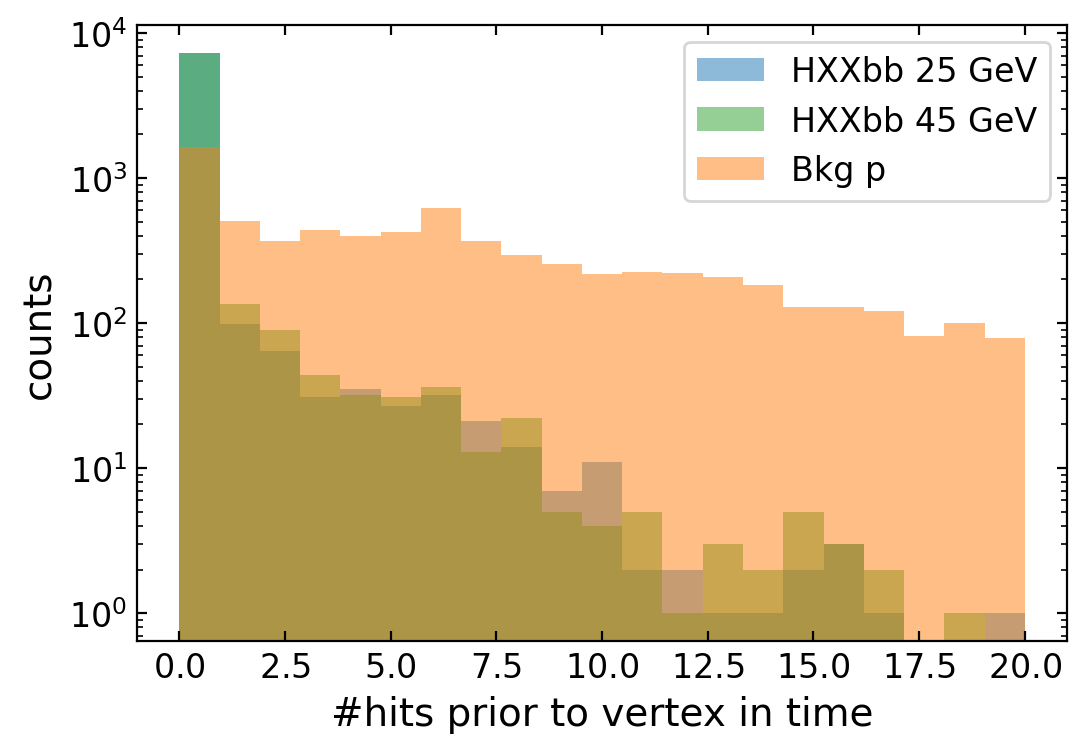

In [1421]:
c_track_before = lambda data: res["vertex_ndigi_before_limited"] <= 0

for i, res in enumerate([res_sig1, res_sig2, res_bkg]):
    res.add_cut(c_track_before, "N digi before")
    mask =   res.get_cut("More than 2 tracks") & res.get_cut("Fiducial volume") # res.get_cut("N_hits vs N_veto") &res.get_cut("N_hits vs N_veto 2") #| res.get_cut("True") res.get_cut("N track downward") & res.get_cut("Track velocity") &
    # mask =  res.get_cut("True") 
    print(sum(mask))    
    plt.hist(res["vertex_ndigi_before_limited"][mask], range=(0,20), bins=21, alpha=0.5, color=colors[i], label=labels[i])
plt.xlabel("#hits prior to vertex in time")
plt.ylabel("counts")
plt.yscale("log")
plt.legend()

Add cut: Angle to CMS, passage fraction 0.8639726178646351, (& > 2 tracks): 0.789665452136469
Add cut: Angle to CMS, passage fraction 0.7325970548862115, (& > 2 tracks): 0.6874163319946452
Add cut: Angle to CMS, passage fraction 0.11386497458273254, (& > 2 tracks): 0.0038732565257483887


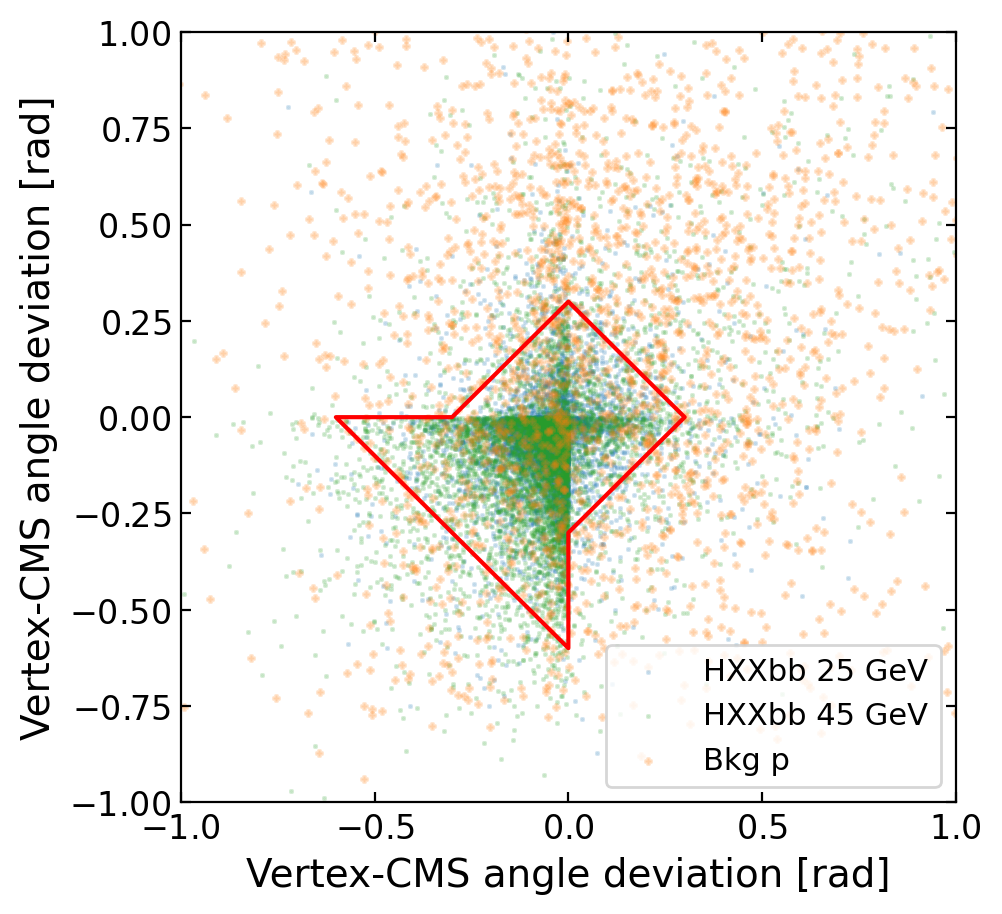

In [1422]:
# c_angle_hv = lambda data: ((abs(res["vertex_cms_angle_h"])<0.5) & (abs(res["vertex_cms_angle_v"]) < 0.5))
# c_angle_hv = lambda data: (((res["vertex_cms_angle_h"])<0.2) & ((res["vertex_cms_angle_v"]) < 0.2))

cut_angel_v1 = 0.3
cut_angel_v2 = 0.6
c_angle_hv = lambda data: (abs(res["vertex_cms_angle_h"]) + abs(res["vertex_cms_angle_v"]) < cut_angel_v1) | \
        (((-res["vertex_cms_angle_h"] - res["vertex_cms_angle_v"]) < cut_angel_v2) & (res["vertex_cms_angle_h"]<0.02) & (res["vertex_cms_angle_v"]<0.02))

# c_angle_hv = lambda data: (((-res["vertex_cms_angle_h"] - res["vertex_cms_angle_v"]) < 0.5) & (res["vertex_cms_angle_h"]<0.02) & (res["vertex_cms_angle_v"]<0.02))

plt.figure(figsize=(5,5))
for i, res in enumerate([res_sig1, res_sig2, res_bkg]):
    res.add_cut(c_angle_hv, "Angle to CMS")
    mask = res.get_cut("More than 2 tracks") & res.get_cut("N track downward") & res.get_cut("Fiducial volume") # & res.get_cut("Track velocity") & res.get_cut("N digi before") & res.get_cut("N_hits vs N_veto") & res.get_cut("N_hits vs N_veto 2") # &res.get_cut("N_tracks")  | res.get_cut("True")
    # mask = res.get_cut("True")
    
    x = (res["vertex_cms_angle_h"])[mask]
    y = res["vertex_cms_angle_v"][mask]
    plt.scatter(x, y, alpha=0.2 + np.heaviside(i-1, 0) * (-0.0), s=1 + np.heaviside(i-1, 0) * (4), color=colors[i], label=labels[i], marker=markers[i])




# Plot the cut region
col = mpl.collections.PolyCollection([[[-cut_angel_v1,0], [0, cut_angel_v1], [cut_angel_v1,0], [0, -cut_angel_v1], [0,-cut_angel_v2], [-cut_angel_v2,0]]], alpha=1, edgecolors="r")
col.set_linewidth(1.5)
col.set_facecolor('none')  # Transparent face
plt.gca().add_collection(col)


plt.xlabel("Vertex-CMS angle deviation [rad]")
plt.ylabel("Vertex-CMS angle deviation [rad]")
# plt.yscale("log")
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.legend(fontsize=11)

7003
5787
2750


Text(0, 0.5, 'Vertex-CMS deviation [rad]')

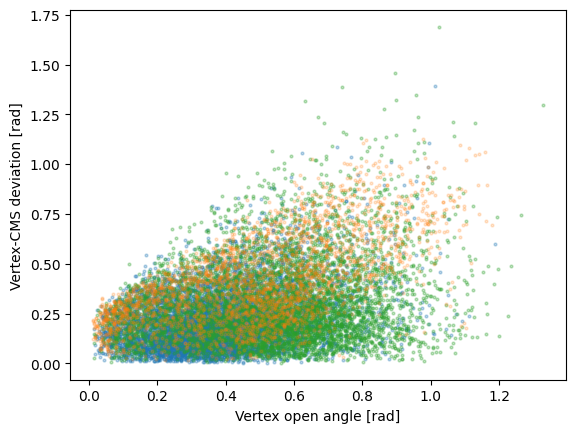

In [1132]:

f_cms_angle = lambda x: x+0.5
c_nhits2 = lambda data: (res["vertex_cms_angle"]) < f_cms_angle(res["vertex_open_angle"])

for i, res in enumerate([res_sig1, res_sig2, res_bkg]):
    # res.add_cut(c_nhits2, "Angle to CMS 2")

    mask =  res.get_cut("N track downward") & \
            res.get_cut("N digi before") & \
            res.get_cut("Track velocity") & \
            res.get_cut("Angle to CMS") #| res.get_cut("True")

    # mask = res.get_cut("More than 2 tracks")
    # mask = res.get_cut("True")
    print(sum(mask))

    # mask = res.get_cut("N track downward") & res.get_cut("N_hits vs N_veto")
    # mask = res.get_cut("N track downward") & res.get_cut("N_hits vs N_veto") & res.get_cut("N track upward") & res.get_cut("N digi before") #| res.get_cut("True")

    x = res["vertex_open_angle"][mask]
    y = res["vertex_cms_angle"][mask] # vertex_cms_angle_h vertex_cms_angle
    # plt.scatter(x, y, alpha=0.3 + np.heaviside(i-1, 0) * (-0.2), s=1, color=colors[i])
    plt.scatter(x, y, alpha=0.3 + np.heaviside(i-1, 0) * (-0.1), s=4, color=colors[i])

plt.xlabel("Vertex open angle [rad]")
plt.ylabel("Vertex-CMS deviation [rad]")
# plt.yscale("log")

In [1351]:
for i, res in enumerate([res_sig1, res_sig2, res_bkg]):
    
    cuts_indirect = [6,7,2,3,]
    cuts_direct = [9,4,5]
    
    res.cuts_active = cuts_indirect + cuts_direct
    res.print_active()
    print()

    if "bkg" in labels[i]:
        res.cuts_active =  cuts_direct + cuts_indirect
        res.print_active()
        print("\n")

Total events: 9057
Cut 6 : N digi before       , npassed   8550, passage fraction 0.9440212
Cut 7 : Angle to CMS        , npassed   7423, passage fraction 0.8195871
Cut 2 : N track downward    , npassed   7130, passage fraction 0.7872364
Cut 3 : Track velocity      , npassed   7003, passage fraction 0.7732141
Cut 9 : More than 3 tracks  , npassed   5657, passage fraction 0.6245998
Cut 4 : N_hits vs N_veto    , npassed   5480, passage fraction 0.6050569
Cut 5 : N_hits vs N_veto 2  , npassed   5478, passage fraction 0.6048360

Total events: 9057
Cut 9 : More than 3 tracks  , npassed   6411, passage fraction 0.7078503
Cut 4 : N_hits vs N_veto    , npassed   6130, passage fraction 0.6768246
Cut 5 : N_hits vs N_veto 2  , npassed   6127, passage fraction 0.6764933
Cut 6 : N digi before       , npassed   5869, passage fraction 0.6480071
Cut 7 : Angle to CMS        , npassed   5605, passage fraction 0.6188583
Cut 2 : N track downward    , npassed   5513, passage fraction 0.6087005
Cut 3 : Trac

In [1428]:
reload(hplt)

<module 'simhelper.helper_plt' from '/home/tomren/geant_projects/mathusla-newsim/studies/mathusla40/cosmic_p/../../../python/simhelper/helper_plt.py'>

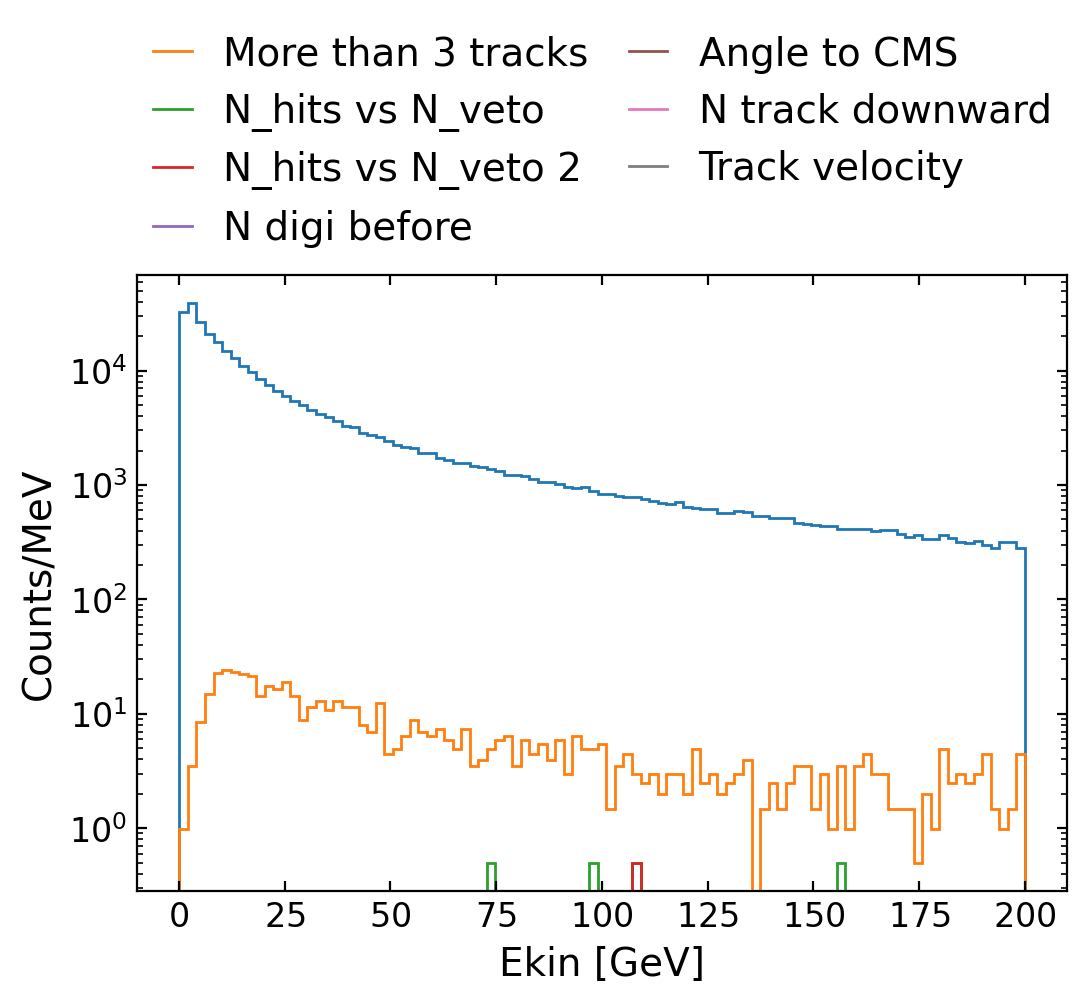

In [1431]:
cuts_active =  cuts_direct + cuts_indirect
# cuts_active =  cuts_indirect + cuts_direct

mask = res.get_cut("True")
bins = np.linspace(0.1, 2e2,100)
# bins = np.logspace(2,5.5,100)
n,ibins = np.histogram(ek[mask]*.001, bins=bins);
plt.stairs(n/np.diff(ibins), ibins)

for i in cuts_active:
    name = self.cuts_name[i]
    mask = mask & self.cuts_dict[name].get_mask()    
    n,ibins = np.histogram(ek[mask]*0.001, bins=bins);
    plt.stairs(n/np.diff(ibins), ibins, label=name)
plt.yscale("log")
# plt.xscale("log")
plt.xlabel("Ekin [GeV]")
plt.ylabel("Counts/MeV")
hplt.legend_top(fontsize=10)

6550
5576
0


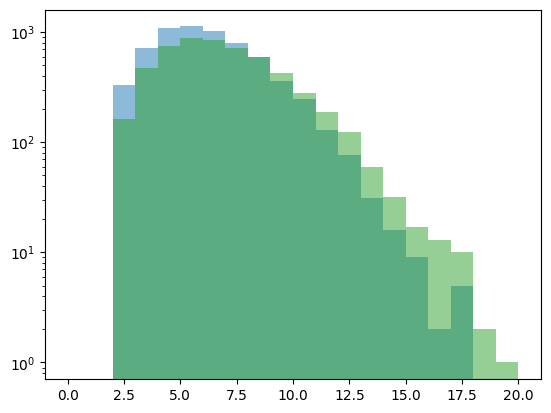

In [1121]:
for i, res in enumerate([res_sig1, res_sig2, res_bkg]):
    mask =  res.get_cut("N_hits vs N_veto") & \
            res.get_cut("N_hits vs N_veto 2") & \
            res.get_cut("N track downward") & \
            res.get_cut("N digi before") & \
            res.get_cut("Track velocity") & \
            res.get_cut("Angle to CMS") #| res.get_cut("True")

    mask =  res.get_cut("N_hits vs N_veto") & \
            res.get_cut("N_hits vs N_veto 2") & \
            res.get_cut("N track downward") & \
            res.get_cut("N digi before") & \
            res.get_cut("Track velocity") & \
            res.get_cut("Angle to CMS") #| res.get_cut("True")    
    
    print(sum(mask))
    # plt.hist((res["vertex_ntracks"] - res["vertex_ndownward_track"])[mask], bins=20,range=(0,20), alpha=0.5);
    plt.hist(res["vertex_ntracks"][mask], bins=20,range=(0,20), alpha=0.5+ np.heaviside(i-1, 0) * 0.5, color=colors[i]);
plt.yscale("log")
plt.show()

8149
8162
25217


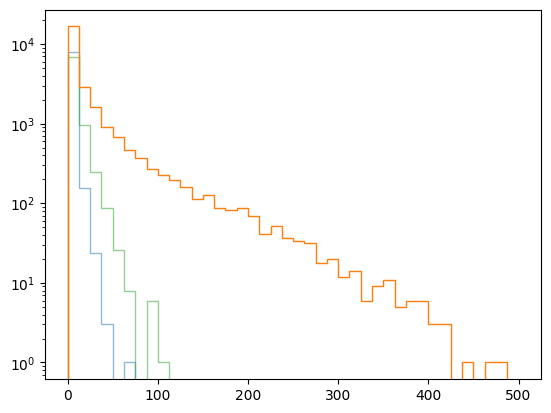

In [905]:
for i, res in enumerate([res_sig1, res_sig2, res_bkg]):
    mask = res.get_cut("More than 2 tracks")
    print(sum(mask))
    # plt.hist((res["vertex_ntracks"] - res["vertex_ndownward_track"])[mask], bins=20,range=(0,20), alpha=0.5);
    plt.hist(res["vertex_ndigi_veto_after_comp"][mask], bins=40,range=(0,500), alpha=0.5+ np.heaviside(i-1, 0) * 0.5, color=colors[i], histtype="step");
plt.yscale("log")
plt.show()

(-1.0, 100.0)

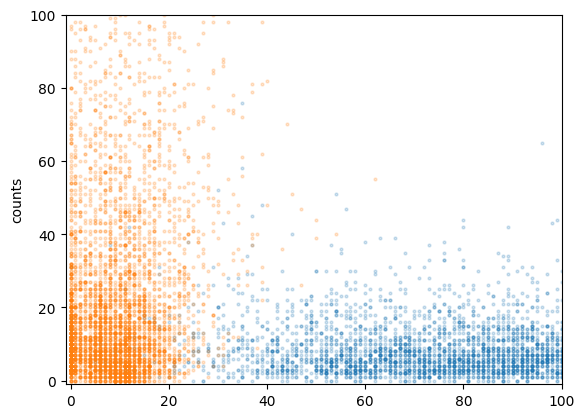

In [381]:
for res in [res_sig2, res_bkg]:
    mask =  res.get_cut("N_hits vs N_veto") & \
            res.get_cut("N_hits vs N_veto 2") & \
            res.get_cut("N track downward") & \
            res.get_cut("N digi before") & \
            res.get_cut("Angle to CMS") #| res.get_cut("True")

    mask = res.get_cut("N track downward") & res.get_cut("N digi before") & res.get_cut("Angle to CMS")
    # plt.hist(res["vertex_ndigi_veto_after_comp"][mask], bins=51, alpha=0.5, range=(-1,20))
    plt.scatter(res["vertex_ndigi_active_after_comp"][mask],(res["vertex_ndigi_veto_after"] - res["vertex_ndigi_veto_after_comp"])[mask], s=4, alpha=0.2)
    # plt.scatter(res["vertex_ndigi_active_after_comp"][mask],res["vertex_ndigi_veto_after"][mask], s=10, alpha=0.5)

plt.ylabel("counts")
# plt.yscale("log")
plt.xlim(-1,100)
plt.ylim(-1,100)

7234
7198
22


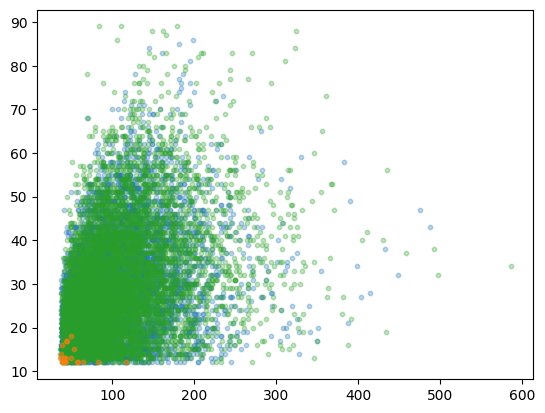

In [1140]:
for i, res in enumerate([res_sig1, res_sig2, res_bkg]):
    mask = res.get_cut("More than 2 tracks") &res.get_cut("N_hits vs N_veto") #| res.get_cut("True")
    print(sum(mask))
    # mask = res.get_cut("True")
    # mask = res.get_cut("N_tracks") 


    x = (res["vertex_ndigi_active_after_comp"])[mask]
    y = (res["vertex_ndigi"])[mask]
    # y = (res["event_nhits"] - res["event_track_nhits"] + res["vertex_ndigi"]- res["vertex_ndigi_active_after_comp"])[mask]
    plt.scatter(x, y, alpha=0.3+ np.heaviside(i-1, 0) * 0.2, s=10, color=colors[i])

In [1213]:
res = res_bkg
mask = res.get_cut("More than 2 tracks") &res.get_cut("N_hits vs N_veto")&res.get_cut("N_hits vs N_veto 2") #| res.get_cut("True")

        # res.get_cut("Angle to CMS") #| res.get_cut("True")
print(sum(mask))
plotinds = res["ROOT_entry"][mask]

9


11 14


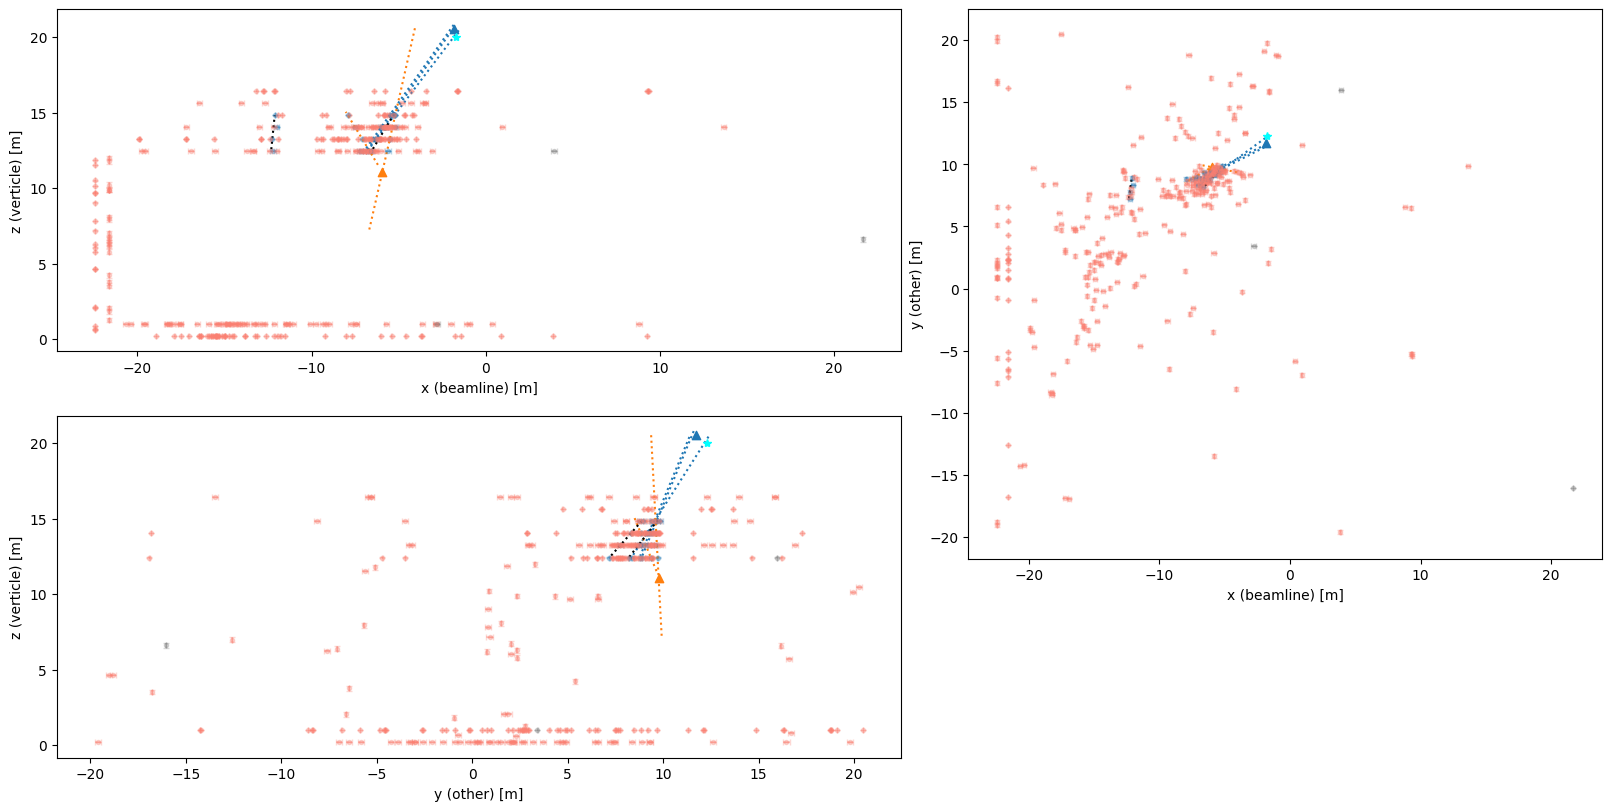

In [1212]:
i+=1
# i=0
j=plotinds[i]
print(i, j)

data = fbkg.get_entry(j)
event = datatypes.Event(data, metadata_digi)  
event.plot()

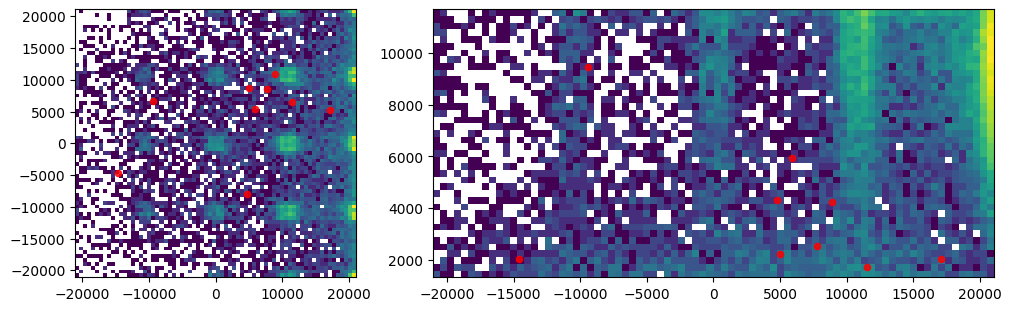

In [1189]:
for i, res in enumerate([res_bkg]):
    mask = res.get_cut("More than 2 tracks") #& res.get_cut("N track downward")#| res.get_cut("True")
    mask_scatter = res.get_cut("More than 2 tracks") &res.get_cut("N_hits vs N_veto")&res.get_cut("N_hits vs N_veto 2") #| res.get_cut("True")

    
    # print(sum(mask))
    fig = plt.figure(figsize=(10,3), layout="constrained")
    spec = fig.add_gridspec(1,3)
    
    ax1 = fig.add_subplot(spec[:, :1])
    ax2 = fig.add_subplot(spec[:, 1:])

    x = (res["vertex_xyzt"][:,0])[mask]
    y = (res["vertex_xyzt"][:,1])[mask]
    xs = (res["vertex_xyzt"][:,0])[mask_scatter]
    ys = (res["vertex_xyzt"][:,1])[mask_scatter]    
    ax1.hist2d(x, y, bins=(70,70), norm=mpl.colors.LogNorm())
    ax1.scatter(xs, ys, alpha=0.83 - np.heaviside(i-1,0)*0.08, s=20 - np.heaviside(i-1,0)*1, color="r")

    x = (res["vertex_xyzt"][:,0])[mask]
    y = (res["vertex_xyzt"][:,2])[mask]
    xs = (res["vertex_xyzt"][:,0])[mask_scatter]
    ys = (res["vertex_xyzt"][:,2])[mask_scatter]    
    ax2.hist2d(x, y, bins=(80,40), norm=mpl.colors.LogNorm())
    ax2.scatter(xs, ys, alpha=0.83 - np.heaviside(i-1,0)*0.08, s=20 - np.heaviside(i-1,0)*1, color="r")
    
    plt.show()

In [1214]:
res = res_sig2
mask = res.get_cut("More than 2 tracks") &res.get_cut("N_hits vs N_veto")&res.get_cut("N_hits vs N_veto 2") #| res.get_cut("True")

        # res.get_cut("Angle to CMS") #| res.get_cut("True")
print(sum(mask))
plotinds = res["ROOT_entry"][mask]

7135


In [1289]:
reload(datatypes)

<module 'simhelper.datatypes' from '/home/tomren/geant_projects/mathusla-newsim/studies/mathusla40/cosmic_p/../../../python/simhelper/datatypes.py'>

55 73


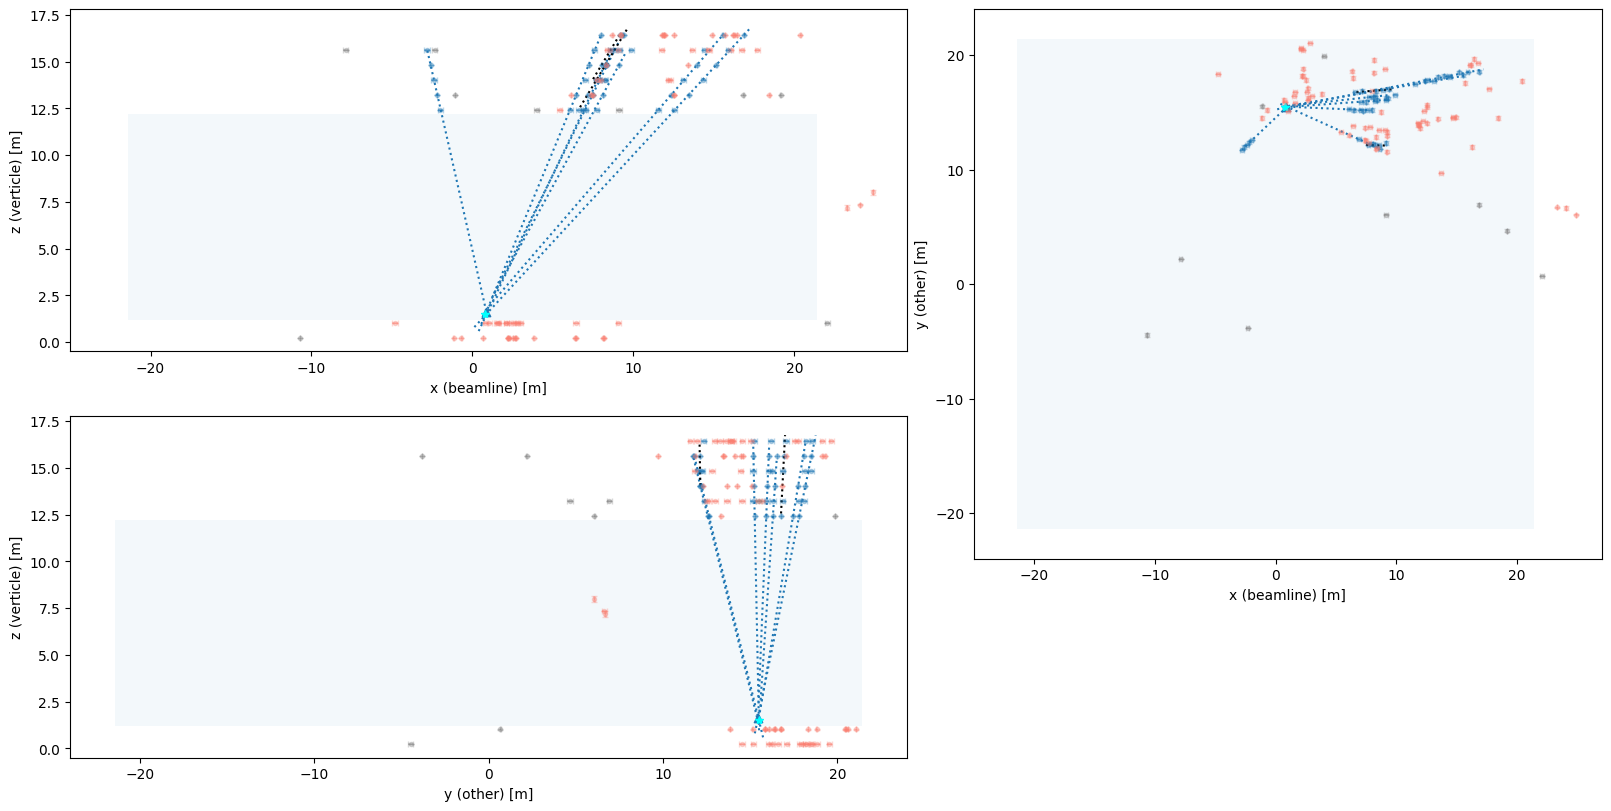

In [1290]:
i+=1
# i=0
j=plotinds[i]
print(i, j)

data = fsig2.get_entry(j)
event = datatypes.Event(data, metadata_digi)  
event.plot()


In [907]:
fsig2.tree

for branch in fsig2.tree.GetListOfBranches():
    # Get the leaf for the branch
    leaf = branch.GetLeaf(branch.GetName())
    # Get the data type of the leaf
    data_type = leaf.GetTypeName()
    
    print(leaf, data_type)

Name: SimEntry Title: SimEntry Int_t
Name: Track_x0 Title: Track_x0 vector<float>
Name: Track_y0 Title: Track_y0 vector<float>
Name: Track_z0 Title: Track_z0 vector<float>
Name: Track_t0 Title: Track_t0 vector<float>
Name: Track_kx Title: Track_kx vector<float>
Name: Track_ky Title: Track_ky vector<float>
Name: Track_kz Title: Track_kz vector<float>
Name: Track_kt Title: Track_kt vector<float>
Name: Track_cov Title: Track_cov vector<float>
Name: Track_chi2 Title: Track_chi2 vector<float>
Name: Track_id Title: Track_id vector<int>
Name: Track_iv_ind Title: Track_iv_ind vector<int>
Name: Track_iv_err Title: Track_iv_err vector<int>
Name: Track_digiInds Title: Track_digiInds vector<int>
Name: Vertex_x0 Title: Vertex_x0 vector<float>
Name: Vertex_y0 Title: Vertex_y0 vector<float>
Name: Vertex_z0 Title: Vertex_z0 vector<float>
Name: Vertex_t0 Title: Vertex_t0 vector<float>
Name: Vertex_cov Title: Vertex_cov vector<float>
Name: Vertex_chi2 Title: Vertex_chi2 vector<float>
Name: Vertex_id Tit